# Import packages

In [1]:
#!pip install statsmodels

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm
import sklearn.metrics

# Import data

In [24]:
# Import data from URL and add column names
auto_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header = None
                     , na_values = '?')

auto_df.columns = [
 'symboling'
 ,'normalized-losses'
 ,'make'
 ,'fuel-type'
 ,'aspiration'
 ,'num-of-doors'
 ,'body-style'
 ,'drive-wheels'
 ,'engine-location'
 ,'wheel-base'
 ,'length'
 ,'width'
 ,'height'
 ,'curb-weight'
 ,'engine-type'
 ,'num-of-cylinders'
 ,'engine-size'
 ,'fuel-system'
 ,'bore'
 ,'stroke'
 ,'compression-ratio'
 ,'horsepower'
 ,'peak-rpm'
 ,'city-mpg'
 ,'highway-mpg'
 , 'price'
]

In [25]:
# Top 5 rows to get a sense of what the data looks like
auto_df = auto_df[auto_df.columns[1:]]
auto_df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Data imputation

In [26]:
# Impute values for columns with NAs
auto_df['normalized-losses'].fillna(auto_df['normalized-losses'].median(), inplace=True)
auto_df['num-of-doors'].fillna(auto_df['num-of-doors'].mode(), inplace=True)
auto_df['bore'].fillna(auto_df['bore'].median(), inplace=True)
auto_df['stroke'].fillna(auto_df['stroke'].median(), inplace=True)
auto_df['horsepower'].fillna(auto_df['horsepower'].median(), inplace=True)
auto_df['peak-rpm'].fillna(auto_df['peak-rpm'].median(), inplace=True)
auto_df['price'].fillna(auto_df['price'].median(), inplace=True)

# Data exploration

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


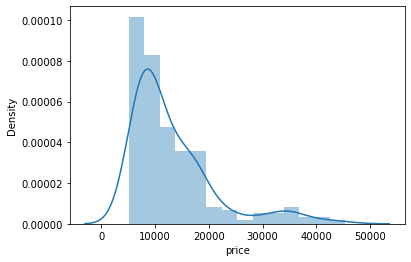

In [27]:
# Response variable does have significant skew
sns.distplot(auto_df['price']);

# Modeling preparation

In [28]:
# Isolate response variable
y = pd.DataFrame(auto_df['price'])

In [29]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [30]:
# Drop response variable from feature dataframe
X = auto_df.drop('price', axis=1)

In [31]:
X.shape

(205, 24)

In [32]:
X.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [33]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear and polynomial modeling

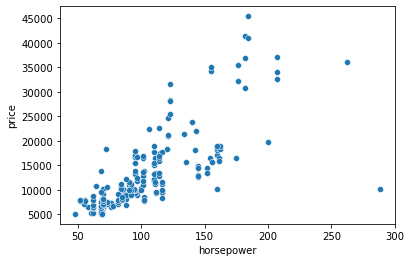

In [34]:
# Plot response variable vs feature of interest
sns.scatterplot(x='horsepower', y='price', data=auto_df);

In [35]:
# Train linear model
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train, X_train[['horsepower', 'const']])

simple_result = simple_model.fit()

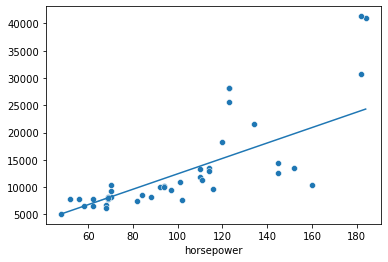

In [36]:
# Predict on test set and plot results
X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['horsepower', 'const']])

# plot results
sns.scatterplot(x = X_test['horsepower'], y = y_test.values.ravel())
sns.lineplot(x = X_test['horsepower'] , y = y_pred_simple);

In [37]:
# Print evaluation metrics table
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     203.8
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.87e-30
Time:                        13:54:55   Log-Likelihood:                -1631.2
No. Observations:                 164   AIC:                             3266.
Df Residuals:                     162   BIC:                             3273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   141.3121      9.899     14.275      0.0

## Create polynomial regression features of nth degree
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [38]:
poly_reg = PolynomialFeatures(degree = 5)

X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['horsepower']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['horsepower']))

In [39]:
# Fit linear model now polynomial features
poly_model = LinearRegression()

poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

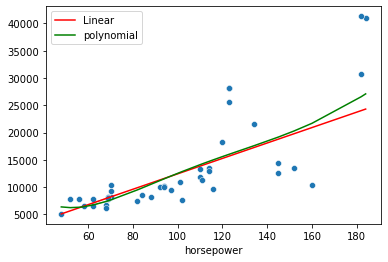

In [40]:
# Plot to compare models
sns.scatterplot(x = X_test['horsepower'], y = y_test.values.ravel())
sns.lineplot(x = X_test['horsepower'] , y = y_pred_simple,color='r',label='Linear')
sns.lineplot(x = X_test['horsepower'] , y = y_poly_pred.ravel(),color='g',label='polynomial');

In [41]:
# Retrain to be able to print summary table
poly_model = sm.OLS(y_train, X_poly_train)
poly_result = poly_model.fit()

In [42]:
#y_poly_pred = poly_model.predict(X_poly_test)

In [43]:
# Print model evaluation metrics
print(poly_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     64.60
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.91e-36
Time:                        14:09:02   Log-Likelihood:                -1606.7
No. Observations:                 164   AIC:                             3225.
Df Residuals:                     158   BIC:                             3244.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.178e+04   3.92e+04      1.065      0.2